## Data Wrangling/Transformation

In [1]:
#import pandas library
import pandas as pd

In [2]:
#reading files
event = pd.read_csv('event_type.csv')
log = pd.read_csv('log_feature.csv')
resource = pd.read_csv('resource_type.csv')
severity = pd.read_csv('severity_type.csv')
train = pd.read_csv('train_.csv')

We shall use the pandas library for data manipulation; basically to transform datasets into the following format

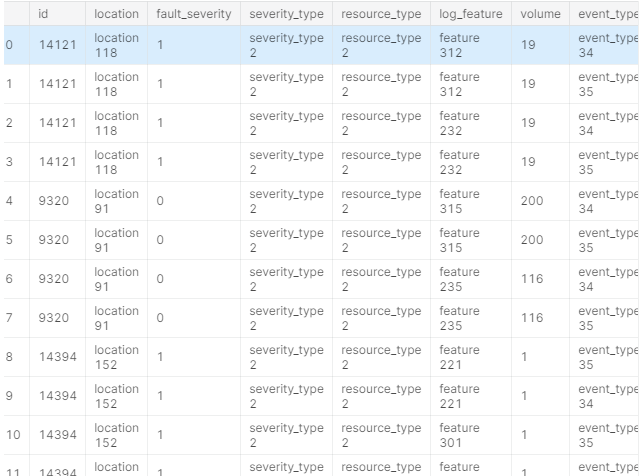

In [3]:
from PIL import Image
output = Image.open("Final Merge Output.PNG")
output

### View each dataset


In [4]:
event.head()

,id,event_type
0,6597,event_type 11
1,8011,event_type 15
2,2597,event_type 15
3,5022,event_type 15
4,5022,event_type 11


In [5]:
resource.head()

,id,resource_type
0,6597,resource_type 8
1,8011,resource_type 8
2,2597,resource_type 8
3,5022,resource_type 8
4,6852,resource_type 8


In [6]:
log.head()

,id,log_feature,volume
0,6597,feature 68,6
1,8011,feature 68,7
2,2597,feature 68,1
3,5022,feature 172,2
4,5022,feature 56,1


In [7]:
severity.head()

,id,severity_type
0,6597,severity_type 2
1,8011,severity_type 2
2,2597,severity_type 2
3,5022,severity_type 1
4,6852,severity_type 1


In [8]:
train.head()

,id,location,fault_severity
0,14121,location 118,1
1,9320,location 91,0
2,14394,location 152,1
3,8218,location 931,1
4,14804,location 120,0


### Check data type of each dataset

In [9]:
event.dtypes

id             int64
event_type    object
dtype: object

In [10]:
log.dtypes

id              int64
log_feature    object
volume          int64
dtype: object

In [11]:
resource.dtypes

id                int64
resource_type    object
dtype: object

In [12]:
severity.dtypes

id                int64
severity_type    object
dtype: object

In [13]:
train.dtypes

id                 int64
location          object
fault_severity     int64
dtype: object

### Convert to numeric datatype

In [14]:
event['id'] = pd.to_numeric(event['id'], errors = 'coerce')
log['id'] = pd.to_numeric(log['id'], errors = 'coerce')
resource['id'] = pd.to_numeric(resource['id'], errors = 'coerce')
severity['id'] = pd.to_numeric(severity['id'], errors = 'coerce')
train['id'] = pd.to_numeric(train['id'], errors = 'coerce')

### Merge datasets

In [15]:
train_1=train.merge(severity, how = 'left', left_on = 'id', right_on = 'id' )
train_2=train_1.merge(resource, how = 'left', left_on = 'id', right_on = 'id' )
train_3=train_2.merge(log, how = 'left', left_on = 'id', right_on = 'id' )
train_4=train_3.merge(event, how = 'left', left_on = 'id', right_on = 'id' )

In [16]:
#Get the dimensions of the merged dataset
print("Dimensions of frist merge : {}".format(train_1.shape))
print("Dimensions of second merge : {}".format(train_2.shape))
print("Dimensions of third merge : {}".format(train_3.shape))
print("Dimensions of final merge : {}".format(train_4.shape))

#View merge output
train_4

Dimensions of frist merge : (7381, 4)
Dimensions of second merge : (8460, 5)
Dimensions of third merge : (28556, 7)
Dimensions of final merge : (61839, 8)


,id,location,fault_severity,severity_type,resource_type,log_feature,volume,event_type
0,14121,location 118,1,severity_type 2,resource_type 2,feature 312,19,event_type 34
1,14121,location 118,1,severity_type 2,resource_type 2,feature 312,19,event_type 35
2,14121,location 118,1,severity_type 2,resource_type 2,feature 232,19,event_type 34
3,14121,location 118,1,severity_type 2,resource_type 2,feature 232,19,event_type 35
4,9320,location 91,0,severity_type 2,resource_type 2,feature 315,200,event_type 34
...,...,...,...,...,...,...,...,...
61834,15189,location 7,0,severity_type 1,resource_type 8,feature 55,10,event_type 11
61835,15189,location 7,0,severity_type 1,resource_type 8,feature 70,1,event_type 11
61836,17067,location 885,0,severity_type 1,resource_type 8,feature 81,1,event_type 11
61837,17067,location 885,0,severity_type 1,resource_type 8,feature 191,1,event_type 11


The merged dataset has duplicates

### Drop duplicates

In [17]:
#Drop duplicates
without_duplicates = train_4.drop_duplicates(subset = 'id', keep = 'first')

In [18]:
#Reset index
without_duplicates.reset_index(inplace = True, drop = True)

### Check for missing data

In [19]:
without_duplicates.isnull().sum()

id                0
location          0
fault_severity    0
severity_type     0
resource_type     0
log_feature       0
volume            0
event_type        0
dtype: int64

There are missing data in the merged dataset

In [21]:
#Shape before removing duplicates
train_4.shape

(61839, 8)

In [22]:
#Shape after removing duplicates
without_duplicates.shape

(7381, 8)

### Subsetting

In [23]:
#subsetting first 10 rows and all columns
without_duplicates.iloc[:10]

,id,location,fault_severity,severity_type,resource_type,log_feature,volume,event_type
0,14121,location 118,1,severity_type 2,resource_type 2,feature 312,19,event_type 34
1,9320,location 91,0,severity_type 2,resource_type 2,feature 315,200,event_type 34
2,14394,location 152,1,severity_type 2,resource_type 2,feature 221,1,event_type 35
3,8218,location 931,1,severity_type 1,resource_type 8,feature 80,9,event_type 15
4,14804,location 120,0,severity_type 1,resource_type 2,feature 134,1,event_type 34
5,1080,location 664,0,severity_type 1,resource_type 8,feature 171,8,event_type 11
6,9731,location 640,0,severity_type 4,resource_type 2,feature 374,3,event_type 50
7,15505,location 122,0,severity_type 2,resource_type 2,feature 235,1,event_type 34
8,3443,location 263,1,severity_type 2,resource_type 2,feature 312,1,event_type 34
9,13300,location 613,1,severity_type 1,resource_type 8,feature 71,1,event_type 54


In [24]:
#subsetting rows from index 5 - 10 and all columns
without_duplicates.iloc[5:10]

,id,location,fault_severity,severity_type,resource_type,log_feature,volume,event_type
5,1080,location 664,0,severity_type 1,resource_type 8,feature 171,8,event_type 11
6,9731,location 640,0,severity_type 4,resource_type 2,feature 374,3,event_type 50
7,15505,location 122,0,severity_type 2,resource_type 2,feature 235,1,event_type 34
8,3443,location 263,1,severity_type 2,resource_type 2,feature 312,1,event_type 34
9,13300,location 613,1,severity_type 1,resource_type 8,feature 71,1,event_type 54


In [25]:
#Subsetting certain columns and all rows
without_duplicates.iloc[:,[2,4,7]]

,fault_severity,resource_type,event_type
0,1,resource_type 2,event_type 34
1,0,resource_type 2,event_type 34
2,1,resource_type 2,event_type 35
3,1,resource_type 8,event_type 15
4,0,resource_type 2,event_type 34
...,...,...,...
7376,0,resource_type 2,event_type 34
7377,0,resource_type 2,event_type 20
7378,2,resource_type 8,event_type 15
7379,0,resource_type 8,event_type 11


In [26]:
#Subsetting first seven(7) rows and certain columns
without_duplicates.iloc[:7,[1,3,7,6,5]]

,location,severity_type,event_type,volume,log_feature
0,location 118,severity_type 2,event_type 34,19,feature 312
1,location 91,severity_type 2,event_type 34,200,feature 315
2,location 152,severity_type 2,event_type 35,1,feature 221
3,location 931,severity_type 1,event_type 15,9,feature 80
4,location 120,severity_type 1,event_type 34,1,feature 134
5,location 664,severity_type 1,event_type 11,8,feature 171
6,location 640,severity_type 4,event_type 50,3,feature 374


In [27]:
#Subsetting location 613 from the merged dataset
location=without_duplicates[without_duplicates['location']=='location 613'].head()
location

,id,location,fault_severity,severity_type,resource_type,log_feature,volume,event_type
9,13300,location 613,1,severity_type 1,resource_type 8,feature 71,1,event_type 54
71,12896,location 613,2,severity_type 1,resource_type 8,feature 203,7,event_type 54
160,15624,location 613,1,severity_type 1,resource_type 8,feature 193,5,event_type 11
328,4552,location 613,1,severity_type 1,resource_type 8,feature 203,4,event_type 54
350,3287,location 613,1,severity_type 1,resource_type 8,feature 203,4,event_type 11


In [28]:
#Subsetting event_type 11 from the merged dataset
event_type=without_duplicates[without_duplicates['event_type']=='event_type 11']
event_type

,id,location,fault_severity,severity_type,resource_type,log_feature,volume,event_type
5,1080,location 664,0,severity_type 1,resource_type 8,feature 171,8,event_type 11
10,8976,location 760,1,severity_type 1,resource_type 8,feature 136,1,event_type 11
12,10342,location 746,0,severity_type 1,resource_type 2,feature 134,3,event_type 11
13,6741,location 1066,1,severity_type 1,resource_type 8,feature 68,5,event_type 11
14,7187,location 812,0,severity_type 1,resource_type 8,feature 167,5,event_type 11
...,...,...,...,...,...,...,...,...
7367,8336,location 902,0,severity_type 1,resource_type 2,feature 134,1,event_type 11
7373,16687,location 1090,1,severity_type 1,resource_type 8,feature 202,4,event_type 11
7374,6813,location 1115,1,severity_type 1,resource_type 8,feature 73,2,event_type 11
7379,15189,location 7,0,severity_type 1,resource_type 8,feature 191,3,event_type 11


### Export merged dataset as 'csv' file

In [29]:
without_duplicates.to_csv('Telstra output.csv', index = True, encoding = 'utf-8')

### Visualizations

In [30]:
#Import libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

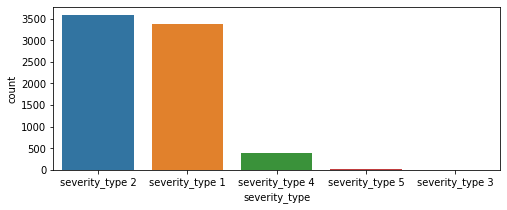

In [31]:
plt.figure(figsize = (8,3))
sns.countplot(without_duplicates['severity_type'])
plt.show()

Count plots are used to visualize frequency distribution of categorical variables.

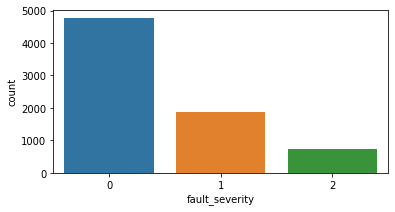

In [32]:
plt.figure(figsize = (6,3))
sns.countplot(without_duplicates['fault_severity'])
plt.show()

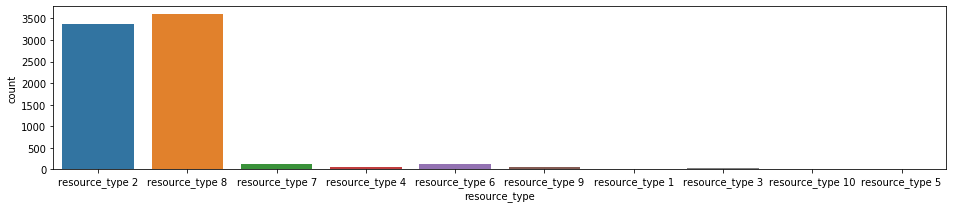

In [33]:
plt.figure(figsize = (16,3))
sns.countplot(without_duplicates['resource_type'])
plt.show()